# Projectile motion
Copied from an old Wikipedia article. We use it for VEX Spin Up to calculate the trajectory of the disk.

### Total Path Length of the Trajectory
$$
L = \int_{0}^{\mathrm{range}} \sqrt{1 + \left ( \frac{\mathrm{d}y}{\mathrm{d}x} \right )^2}\,\mathrm{d}x = \int_{0}^{v_0^2 \sin(2\theta) / g} \sqrt{1 + \left ( -\frac{g}{v_0^2 \cos^2\theta}x + \tan\theta \right )^2}\,\mathrm{d}x
$$

Time of flight: 1.2 s
Horizontal range: 6.3 m
Maximum height: 1.7 m


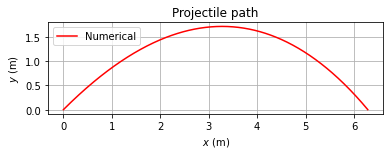

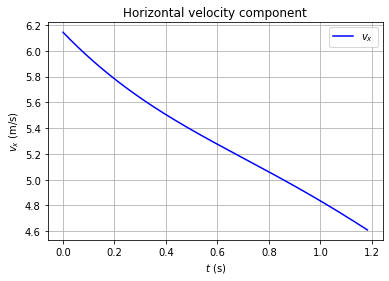

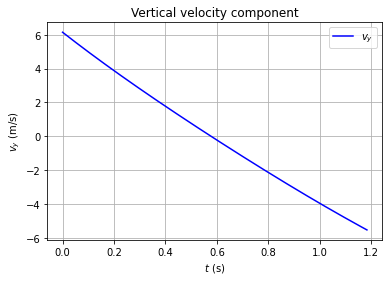

In [1]:
from math import *
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import newton
import matplotlib.pyplot as plt

def projectile_motion(g, mu, xy0, vxy0, tt):
    # use a four-dimensional vector function vec = [x, y, vx, vy]
    def dif(vec, t):
        # time derivative of the whole vector vec
        v = sqrt(vec[2] ** 2 + vec[3] ** 2)
        return [vec[2], vec[3], -mu * v * vec[2], -g - mu * v * vec[3]]

    # solve the differential equation numerically
    vec = odeint(dif, [xy0[0], xy0[1], vxy0[0], vxy0[1]], tt)
    return vec[:, 0], vec[:, 1], vec[:, 2], vec[:, 3]  # return x, y, vx, vy

# Parameters of projectile (modelled after a baseball)
g       = 9.81         # Acceleration due to gravity (m/s^2)
rho_air = 1.29         # Air density (kg/m^3)
v0      = 8.69         # Initial velocity (m/s)
alpha0  = radians(45)  # Launch angle (deg.)
m       = 0.065        # Mass of projectile (kg)
cD      = 0.5          # Drag coefficient (spherical projectile)
r       = 0.05       # Radius of projectile (m)
mu = 0.5 * cD * (pi * r ** 2) * rho_air / m

# Initial position and launch velocity
x0, y0 = 0.0, 0.0
vx0, vy0 = v0 * cos(alpha0), v0 * sin(alpha0)

T_peak = newton(lambda t: projectile_motion(g, mu, (x0, y0), (vx0, vy0), [0, t])[3][1], 0)
y_peak = projectile_motion(g, mu, (x0, y0), (vx0, vy0), [0, T_peak])[1][1]
T = newton(lambda t: projectile_motion(g, mu, (x0, y0), (vx0, vy0), [0, t])[1][1], 2 * T_peak)
t = np.linspace(0, T, 501)
x, y, vx, vy = projectile_motion(g, mu, (x0, y0), (vx0, vy0), t)

print("Time of flight: {:.1f} s".format(T))        # returns  6.6 s
print("Horizontal range: {:.1f} m".format(x[-1]))  # returns 43.7 m
print("Maximum height: {:.1f} m".format(y_peak))   # returns 53.4 m

# Plot of trajectory
fig, ax = plt.subplots()
ax.plot(x, y, "r-", label="Numerical")
ax.set_title(r"Projectile path")
ax.set_aspect("equal")
ax.grid(b=True)
ax.legend()
ax.set_xlabel("$x$ (m)")
ax.set_ylabel("$y$ (m)")
plt.savefig("01 Path.png")

fig, ax = plt.subplots()
ax.plot(t, vx, "b-", label="$v_x$")
ax.set_title(r"Horizontal velocity component")
ax.grid(b=True)
ax.legend()
ax.set_xlabel("$t$ (s)")
ax.set_ylabel("$v_x$ (m/s)")
plt.savefig("02 Horiz vel.png")

fig, ax = plt.subplots()
ax.plot(t, vy, "b-", label="$v_y$")
ax.set_title(r"Vertical velocity component")
ax.grid(b=True)
ax.legend()
ax.set_xlabel("$t$ (s)")
ax.set_ylabel("$v_y$ (m/s)")
plt.savefig("03 Vert vel.png")